## 1. Plugin juypter sql

[ipython-sql](https://github.com/catherinedevlin/ipython-sql)

```bash
pip install ipython-sql
```

In [13]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
%sql sqlite://

'Connected: None@None'

In [4]:
%%sql 
CREATE TABLE writer (first_name, last_name, year_of_death);
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Bertold', 'Brecht', 1956);

Done.
1 rows affected.
1 rows affected.


[]

In [15]:
%%sql
select * from writer;

Done.


first_name,last_name,year_of_death
William,Shakespeare,1616
Bertold,Brecht,1956


Done.


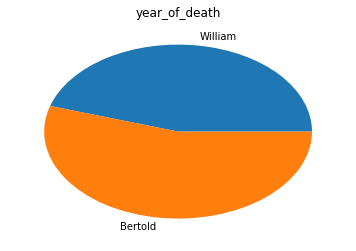

In [16]:
result = %sql select first_name, year_of_death from writer
%matplotlib inline
result.pie();

# 2. raw sql

In [17]:
import sqlite3

In [19]:
con = sqlite3.connect(':memory:')
query = """
    CREATE TABLE test
    (a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);
"""
con.execute(query)
con.commit()

In [21]:
data = [('A', 'CB', 1.25, 6), ('B', 'CC', 0.34, 8),
       ('C', 'DD', 1.11, 19), ('D', 'ZK', 0.11, 3)]
stmt = 'insert into test values(?,?,?,?)'
con.executemany(stmt, data)
con.commit()

In [22]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('A', 'CB', 1.25, 6),
 ('B', 'CC', 0.34, 8),
 ('C', 'DD', 1.11, 19),
 ('D', 'ZK', 0.11, 3)]

In [23]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [24]:
from pandas import DataFrame

In [34]:
# py3 should list the zip object
DataFrame(rows, columns=list(zip(*cursor.description))[0])

,a,b,c,d
0,A,CB,1.25,6
1,B,CC,0.34,8
2,C,DD,1.11,19
3,D,ZK,0.11,3


# 3. pandas.io.sql

In [35]:
import pandas.io.sql as sql

In [37]:
sql.read_sql('select * from test', con)

,a,b,c,d
0,A,CB,1.25,6
1,B,CC,0.34,8
2,C,DD,1.11,19
3,D,ZK,0.11,3
